# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

Our best guess for the first root is at X= 2.9949898225063456
Our best guess for the second root is at X= 2.0092480142749998
Our best guess for the second root is at X= 0.9950101777973495


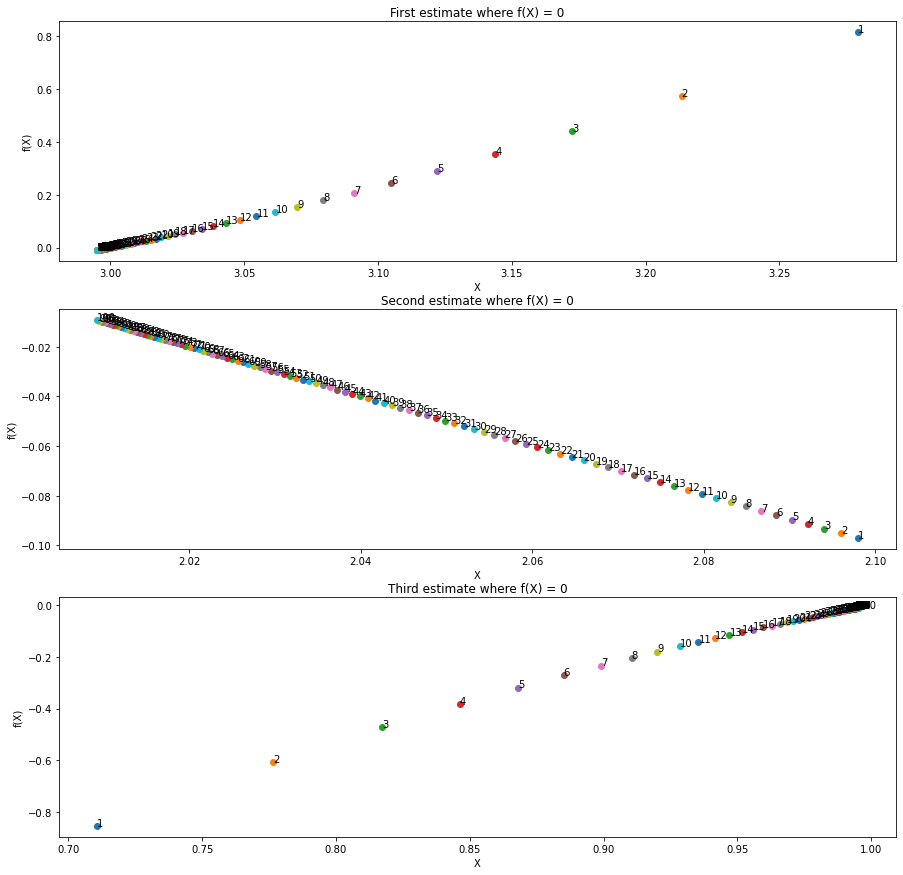

In [1]:
import numpy as np;
import math
import matplotlib.pyplot as plt

#guess
#started with this initial guess then continually guessed lower until I reached a root
x = 5

def Polyfunc(x):
    myF = x**3-6*x**2+11*x-6
    return myF

Xrange = np.linspace(1,20,20)
Fx = Polyfunc(Xrange)

def derivPolyfunc(x):
    myF1 = 3*x**2-12*x+11
    return myF1

def SSE(x):
    err = 0 - (Polyfunc(x));
    SSE = np.sum(err**2);
    return SSE;

def derivative(x):
    DERIVATIVE = (SSE(x+0.01)-SSE(x))/0.01;
    return DERIVATIVE

#setup subplot for zeros
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 15))

#First zero
n = 0
current_x = 3.5;
rate = 0.01; # Try raising in very small increments, from 0.000001 to 0.00001

while n < 100:
    Fx = Polyfunc(current_x)
    new_x = current_x - rate * derivative(current_x);
    current_x=new_x;
    #above section does gradient descent algorith
    n = n + 1;
    ax1.plot(new_x, Polyfunc(new_x),'o');
    ax1.text(new_x, Polyfunc(new_x),n);
    if Fx == 0:
        break
print("Our best guess for the first root is at X=",current_x)
            
#Second zero
n = 0
current_x = 2.1;
rate = 0.01; # Try raising in very small increments, from 0.000001 to 0.00001

while n < 100:
    Fx = Polyfunc(current_x)
    new_x = current_x - rate * derivative(current_x);
    current_x=new_x;
    #above section does gradient descent algorith
    n = n + 1;
    ax2.plot(new_x, Polyfunc(new_x),'o');
    ax2.text(new_x, Polyfunc(new_x),n);
    if Fx == 0:
        break
print("Our best guess for the second root is at X=",current_x)

#Third zero
n = 0
current_x = 0.5;
rate = 0.01; # Try raising in very small increments, from 0.000001 to 0.00001

while n < 100:
    Fx = Polyfunc(current_x)
    new_x = current_x - rate * derivative(current_x);
    current_x=new_x;
    #above section does gradient descent algorith
    n = n + 1;
    ax3.plot(new_x, Polyfunc(new_x),'o');
    ax3.text(new_x, Polyfunc(new_x),n);
    if Fx == 0:
        break
print("Our best guess for the second root is at X=",current_x)

ax1.set(xlabel = 'X', ylabel = 'f(X)')
ax1.set_title('First estimate where f(X) = 0', y=1.0, pad = 5)

ax2.set(xlabel = 'X', ylabel = 'f(X)')
ax2.set_title('Second estimate where f(X) = 0', y=1.0, pad = 5)

ax3.set(xlabel = 'X', ylabel = 'f(X)')
ax3.set_title('Third estimate where f(X) = 0', y=1.0, pad = 5)
plt.show()    

## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# read cars.csv
dat = np.genfromtxt("cars.csv", delimiter=",", skip_header=1)

x = []
y = []

#add data to seperate x and y arrays
for row in dat:
    x.append(row[2])
    y.append(row[1])


arr = np.array([x,y])

#stack and split array based on differnt first column values
arr = np.column_stack(arr)
indices = np.argsort(arr[:, 0])
arr_temp = arr[indices]
sortarr = np.array_split(arr_temp, np.where(np.diff(arr_temp[:,0])!=0)[0]+1)

#Separate 4/6cyl values from 8cyl values
fourcyl = sortarr[0]
sixcyl = sortarr[1]
foursixcyl = np.concatenate((fourcyl, sixcyl))
eightcyl = sortarr[2]

lowcylavg = np.mean(foursixcyl, axis=0)
highcylavg = np.mean(eightcyl, axis=0)

avgmpg46cyl = lowcylavg[1]
avgmpg8cyl = highcylavg[1]
print()
print(f'Average MPG of 4/6 cylinder vehicles is {avgmpg46cyl:0.2f} mpg.')
print(f'Average MPG of 8 cylinder vehicles is {avgmpg8cyl:0.2f} mpg.')


Average MPG of 4/6 cylinder vehicles is 23.97 mpg.
Average MPG of 8 cylinder vehicles is 15.10 mpg.


### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



In [3]:
# Need to make array matrices. This is for when there is an intercept
ylow = np.array(foursixcyl[:,1])
yhigh = np.array(eightcyl[:,1])

#get array lengths
lenlow = len(ylow)
lenhigh = len(yhigh)

#determine x and y values for setting 4/6 cyl to 0 and 8 cyl to 1
Xlowcalc = np.c_[np.zeros(lenlow),ylow]
Xlow = Xlowcalc[:,0]
Xhighcalc = np.c_[np.ones(lenhigh),yhigh]
Xhigh = Xhighcalc[:,0]

y = np.concatenate((ylow, yhigh))
Xvals = np.concatenate((Xlow,Xhigh))

leny= len(y)

# Need to make array matrices. This is for when there is an intercept
X = np.c_[np.ones(leny),Xvals]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ y
print(f'Our intercept is {INTERCEPT:0.2f} and our slope is {SLOPE:0.2f}')

# Need to make array matrices. This is for when there is NO intercept
X = np.c_[Xvals]

tmp = inv(np.matmul(np.transpose(X),X))
SLOPE = tmp @ np.transpose(X) @ y
print("Our slope when we force the intercept to be zero = ",SLOPE)
print()
print("The intercept is just the avg of the 4/6 cylinder vehicles and the slope is the difference\nbetween the 8 cylinder vehicles and the 4/6 cylinder vehicles.")

Our intercept is 23.97 and our slope is -8.87
Our slope when we force the intercept to be zero =  [15.1]

The intercept is just the avg of the 4/6 cylinder vehicles and the slope is the difference
between the 8 cylinder vehicles and the 4/6 cylinder vehicles.
